1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.patches as pltp
from scipy import linalg as la 

In [3]:
N = 1000




#dataset creation

x_1 = npr.randn(N)
x_2 = x_1 + npr.randn(N)*3
x_3 = 2*x_1 + x_2

X = np.array([x_1,x_2,x_3])


#eigendecomposition

C = np.cov(X)
l, V = la.eig(C)
print('eigenstate decomposition:')
print('the eigenvectors of cov matrix are:', np.real_if_close(l))
print('the eigenvectors are:',V.T[0],V.T[1],V.T[2])

#SVD method decomposition:

U, spectrum, Vt = la.svd(C)
print('\SVD method:')
print('squared eigenvalues:', spectrum)
print('eigenvectors:',Vt[0],Vt[1],Vt[2])


#verification:
D = np.dot(V, np.dot(np.diag(np.real_if_close(l)),la.inv(V)))

m,n = U.shape[0], V.shape[0]
O = np.zeros((m,n))
for i in range(min(m, n)):
    O[i, i] = spectrum[i]
E = np.dot(U, np.dot(O, Vt))


print('\nThe two methods lead to the same eigenvectors and eigenvalues. Infact:')
print('\ntest C = D:',np.allclose(C,D))
print('test C = E:',np.allclose(C,E))


eigenstate decomposition:
the eigenvectors of cov matrix are: [2.65444001e+01 4.07806057e-16 1.95335951e+00]
the eigenvectors are: [-0.12064328 -0.5708535  -0.81214006] [-0.81649658 -0.40824829  0.40824829] [ 0.56460476 -0.712362    0.41684752]
\SVD method:
squared eigenvalues: [2.65444001e+01 1.95335951e+00 6.60442490e-16]
eigenvectors: [-0.12064328 -0.5708535  -0.81214006] [ 0.56460476 -0.712362    0.41684752] [-0.81649658 -0.40824829  0.40824829]

The two methods lead to the same eigenvectors and eigenvalues. Infact:

test C = D: True
test C = E: True



If we look at the contributions of different variables to the eigenvalues of covariance matrix:
 26.544400110203828 4.078060572767533e-16 1.9533595058996451
We can see that the second one is negligible with respect to the other two. This is reasonable since there is a variable that is linearly dependent from the others and consequently with a proper rotation (V matrix) in the coordinate space we can find a basis in which almost all the information (>99%) is held by 2 only variables.


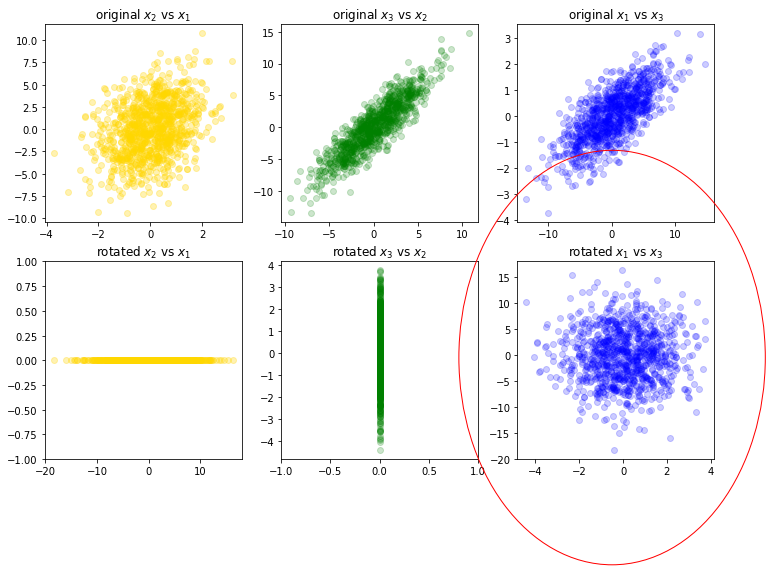

as one might see looking at line 2, the data after the rotation are aligned in a narrow line along one principal axis in the new basis (first and second plot). The third plot contains therefor all the useful information (above 99%), i.e., depicts the spread uncorrelatoed data on a single plane

 It is also visible then how two only features are enough to describe properly this dataset.

 The red circled scatter plot returns the two more important features in rotated space (reducing the dimensionality of the problem in this case is geometrically represented by finding the proper plane on which the data are actually mostly distributed on).


In [9]:
#PCA

l, V = np.linalg.eig(C)
Lambda=np.diag(l)
L_trace = Lambda.trace()

th = 0.99*Lambda.trace()  #set threshold at 99% of trace




#find number of components i which positions in Lambda's trace sum up to 99%
x,i = 0,0
k = l.argsort()     #rank l elements from the smaller to the bigger
z = l[k][::-1]            #reorder l in descendent order
while x < th:
    x += z[i]
    i += 1
#returns i = 2 variables needed    

print('\nIf we look at the contributions of different variables to the eigenvalues of covariance matrix:\n',Lambda[0,0],Lambda[1,1],Lambda[2,2])
print('We can see that the second one is negligible with respect to the other two. This is reasonable since there is a variable that is linearly dependent from the others and consequently with a proper rotation (V matrix) in the coordinate space we can find a basis in which almost all the information (>99%) is held by 2 only variables.')

#The reduced dataset in the original basis is obtained by rotation, reduction(of less significant feature) and counterrotation:
Xp = np.dot(V.T,X)
Xpp = np.delete(Xp, np.argmin(l), 0)
W = np.delete(V, np.argmin(l), 1)
Xppp = np.dot(W, Xpp)


#plot section
gridsize = (2, 3)
fig = plt.figure(figsize=(12, 8))

ax00 = plt.subplot2grid(gridsize, (0, 0))
ax01 = plt.subplot2grid(gridsize, (0, 1))
ax02 = plt.subplot2grid(gridsize, (0, 2))
ax10 = plt.subplot2grid(gridsize, (1, 0))
ax11 = plt.subplot2grid(gridsize, (1, 1))
ax12 = plt.subplot2grid(gridsize, (1, 2))


# a scale factor to emphazise the lines 
scale_factor=0.4


#original distribution:
ax00.scatter(X[0,:], X[1,:], alpha=0.3, color = 'gold')
ax00.set_title('original $x_2$ vs $x_1$')
#ax00.plot([0, scale_factor*l[0]*V.T[0,0]], [0, scale_factor*l[0]*V.T[0,1]], 'r-', lw=2) 
#ax00.plot([0, scale_factor*l[1]*V.T[1,0]], [0, scale_factor*l[1]*V.T[1,1]], 'r-', lw=2) 


ax01.scatter(X[1,:], X[2,:], alpha=0.2, color = 'green')
ax01.set_title('original $x_3$ vs $x_2$')
#ax01.plot([0, scale_factor*l[1]*V.T[1,1]], [0, scale_factor*l[1]*V.T[1,2]], 'r-', lw=2) 
#ax01.plot([0, scale_factor*l[2]*V.T[2,1]], [0, scale_factor*l[2]*V.T[2,2]], 'r-', lw=2) 

ax02.scatter(X[2,:], X[0,:], alpha=0.2, color = 'blue')
ax02.set_title('original $x_1$ vs $x_3$')
#ax02.plot([0, scale_factor*l[2]*V.T[2,0]], [0, scale_factor*l[2]*V.T[2,2]], 'r-', lw=2) 
#ax02.plot([0, scale_factor*l[0]*V.T[0,0]], [0, scale_factor*l[0]*V.T[0,2]], 'r-', lw=2) 




#rotated distribution:
ax10.scatter(Xp[0,:], Xp[1,:], alpha=0.3, color = 'gold')
ax10.set_title('rotated $x_2$ vs $x_1$')
ax10.set_ylim(-1.,1.)
#ax10.plot([0, scale_factor*l[0]*V.T[0,0]], [0, scale_factor*l[0]*V.T[0,1]], 'r-', lw=2) 
#ax10.plot([0, scale_factor*l[1]*V.T[1,0]], [0, scale_factor*l[1]*V.T[1,1]], 'r-', lw=2) 


ax11.scatter(Xp[1,:], Xp[2,:], alpha=0.2, color = 'green')
ax11.set_title('rotated $x_3$ vs $x_2$')
ax11.set_xlim(-1.,1.)
#ax11.plot([0, scale_factor*l[1]*V.T[1,1]], [0, scale_factor*l[1]*V.T[1,2]], 'r-', lw=2) 
#ax11.plot([0, scale_factor*l[2]*V.T[2,1]], [0, scale_factor*l[2]*V.T[2,2]], 'r-', lw=2) 

ax12.scatter(Xp[2,:], Xp[0,:], alpha=0.2, color = 'blue')
ax12.set_title('rotated $x_1$ vs $x_3$')
ell = pltp.Ellipse((-.5, -.5), 14, 80, color='r', clip_on=False, fill=False)
ax12.add_artist(ell)
#ax12.plot([0, scale_factor*l[2]*V.T[2,0]], [0, scale_factor*l[2]*V.T[2,2]], 'r-', lw=2) 
#ax12.plot([0, scale_factor*l[0]*V.T[0,0]], [0, scale_factor*l[0]*V.T[0,2]], 'r-', lw=2) 

plt.show()

print('as one might see looking at line 2, the data after the rotation are aligned in a narrow line along one principal axis in the new basis (first and second plot). The third plot contains therefor all the useful information (above 99%), i.e., depicts the spread uncorrelatoed data on a single plane')
print('\n It is also visible then how two only features are enough to describe properly this dataset.')
print('\n The red circled scatter plot returns the two more important features in rotated space (reducing the dimensionality of the problem in this case is geometrically represented by finding the proper plane on which the data are actually mostly distributed on).')









* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [4]:
sigmas = np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])  #list of (different) standard deviations for noise variables
sigmas /= 50


Z = npr.randn(N,10)*sigmas
Z = Z.T
X = np.vstack((X,Z))
print(np.shape(X))

(13, 1000)


In [9]:

#eigendecomposition of cov matrix:

C = np.cov(X)
l, V = la.eig(C)
print('eigenstate decomposition:')
print('the eigenvalues of cov matrix are:\n', np.real_if_close(l))

k = np.argsort(l)
k = k[::-1]
l = l[k]
V = V[:,k]
X = X[:,k]

Lambda=np.diag(l)
L_trace = Lambda.trace()

th = 0.99*Lambda.trace()  #set threshold at 99% of trace

#find number of components i which positions in Lambda's trace sum up to 99%
x,i = 0,0
while x < th:
    x += l[i]
    i += 1
print('\nThe number of components sufficient to sum up to the 99% of cov matrix trace is',i)
print('As we can see, nothing changes from the previous case since adding randomly distributed variables which are less widely distributed around zero does not affect our data.')
print('In fact, the order of magnitude of their corresponding eigenvalue in cov matrix is negligible w.r.t. the two largest components, which is what we expect from a noise dataset.')

eigenstate decomposition:
the eigenvalues of cov matrix are:
 [3.65684514e+01 1.52653615e+00 1.46268495e-02 8.69540530e-03
 7.26463175e-03 4.25315180e-03 2.61307703e-03 1.16269852e-03
 3.88619630e-04 2.95793692e-04 1.81407418e-05 9.31147263e-16
 2.04337419e-06]

The number of components sufficient to sum up to the 99% of cov matrix trace is 2
As we can see, nothing changes from the previous case since adding randomly distributed variables which are less widely distributed around zero does not affect our data.
In fact, the order of magnitude of their corresponding eigenvalue in cov matrix is negligible w.r.t. the two largest components, which is what we expect from a noise dataset.


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [11]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

import csv

#data importation:

datalist = []

with open('/Users/ale/data/magic04.data') as data_file:
    for line in csv.reader(data_file, delimiter=','): # the delimiter is often guessed by the reader
        # again note that elements of each line are treated as strings
        # if you need to convert them into numbers, you need to to that yourself
        fLength,fWidth,fSize,\
        fConc,fConc1,fAsym,\
        fM3Long,fM3Trans,fAlpha,fDist = map(float,line[:-1])
        datalist.append([fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist])
        

dataset = np.array(datalist)
print(np.shape(dataset))

(19020, 10)
6


In [21]:

#PCA:

C = np.cov(dataset.T)
l, V = np.linalg.eig(C)
Lambda=np.diag(l)
L_trace = Lambda.trace()

th = 0.99*Lambda.trace()  #set threshold at 99% of trace

#find number of components i which positions in Lambda's trace sum up to 99%
x,i = 0,0
k = l.argsort()     #rank l elements from the smaller to the bigger
z = l[k][::-1]            #reorder l in descendent order
while x < th:
    x += z[i]
    i += 1          #index of first unuseful feature after reordering according to cov matrix eigenvalues



red_data = dataset[:,k][:,:i]   #get rid of extra features: new dataset = 19020 entries x 6 columns (features)
print(np.shape(red_data))

(19020, 6)
